In [23]:

import networkx as nx
import matplotlib.pyplot as plt
from PJO1 import *


# get the classes (types) of the individual
get_class  = lambda x: [(x.name,'rdf:type',cls.name) for cls in x.is_a]


  
# get properties for a given individual it return a tuple of a triplet.
get_properties = lambda x: [(x.name, prop.name, getattr(x, prop.name)) for prop in x.get_properties()]



def get_properties(individual):
    '''
    A method to return triplets of the form (subject, predicate, object) for the classes of the individual
    '''
    triples = []
    for prop in individual.get_properties():
        value = getattr(individual, prop.name)
        if isinstance(value, list):
            for v in value:
                triples.append((individual.name, prop.name, v.name if hasattr(v, 'name') else v))
        else:
            triples.append((individual.name, prop.name, value.name if hasattr(value, 'name') else value))   
    return triples


def get_triples(individual):
    return get_class(individual) + get_properties(individual)

# Example RDF triples

def draw_k_graph(triples):
    '''
    A method to draw a knowledge graph from a list of triples representing the encounter the patient had
    '''
    plt.figure(figsize=(10, 8))
    G = nx.DiGraph()
    for s, p, o in triples:
        G.add_edge(s, o, label=p)

    pos = nx.circular_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2000, font_size=6)

    # Draw edge labels (properties)
    edge_labels = nx.get_edge_attributes(G, 'label')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')
    plt.show()
    #plt.savefig("knowledge_graph.png")  # Save the graph as a PNG file






In [24]:
def destroy():
    destroy_entity(patient1)
    destroy_entity(schedule)
    destroy_entity(call_center)
    destroy_entity(encounter)
    hoo.save
#

In [26]:

### Scenario Scheduling
#destroy()


patient1 = Patient("patient1")
patient1.hasAge = 45  # Assigning an age to the patient
patient1.hasName = "John Adams" # Assigning a name to the patient
patient1.hasId = "A12345" # Assigning an ID to the patient
#
encounter = InteractionType('encntr')
encounter.hasPurpose = 'Scheduleing'
encounter.hasModalityType = "call center"

# Scheduling Interaction
schedule = InteractionType('schedule')
schedule.hasPurpose = "Scheduling"
schedule.hasTimestamp = "2025-09-09 12:00:00"
patient1.hasPatientInteraction = schedule




call_center = ModalityType('Call_Center')
call_center.modalityAppliedToPatient.append(patient1)


scheduling_encounter = Encounter('scheduling_encounter')



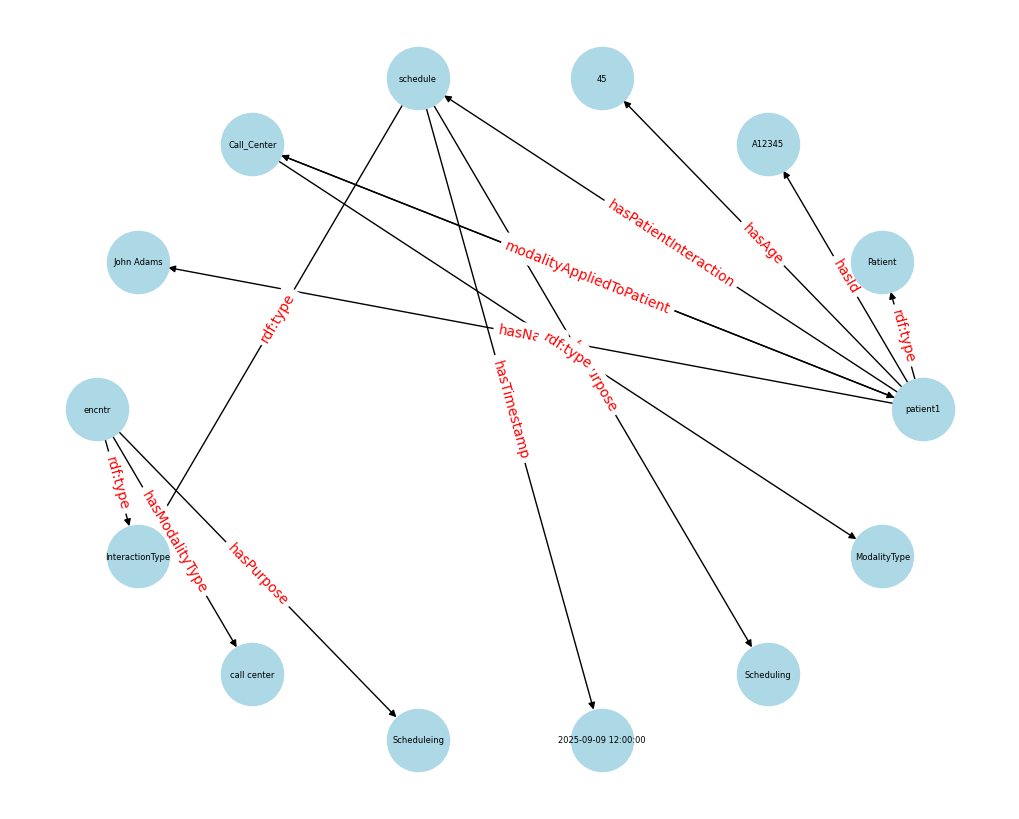

In [27]:
tr = get_triples(patient1) + get_triples(encounter) + get_triples(schedule) + get_triples(call_center)
draw_k_graph(tr)

In [56]:
## Scenario: Follow up visit

In [57]:
## Scenario: Payment event

In [58]:
### Scenario : Surgery
patient1 = Patient("patient1")
patient1.hasAge = 45  # Assigning an age to the patient
patient1.hasName = "John Adams" # Assigning a name to the patient
patient1.hasId = "A12345" # Assigning an ID to the patient
# Define a procedure and link it to the patient
rpp = Procedure("rpp")
#patient1.hasUndergoneProcedure.append(rpp)
#
rpp.procedurePerformedOn.append(patient1)
# Define an interaction type and link it to the patient
f2f = InteractionType("f2f")

patient1.hasPatientInteraction = f2f
rpp.hasTimestamp = "2023-10-01T10:00:00"
patient1.hasProcedureDoneDatetime = rpp.hasTimestamp


[('patient1', 'rdf:type', 'Patient'), ('patient1', 'hasAge', 45), ('patient1', 'hasPatientInteraction', 'schedule'), ('patient1', 'hasId', 'A12345'), ('patient1', 'usesModality', 'Call_Center'), ('patient1', 'hasName', 'John Adams')]


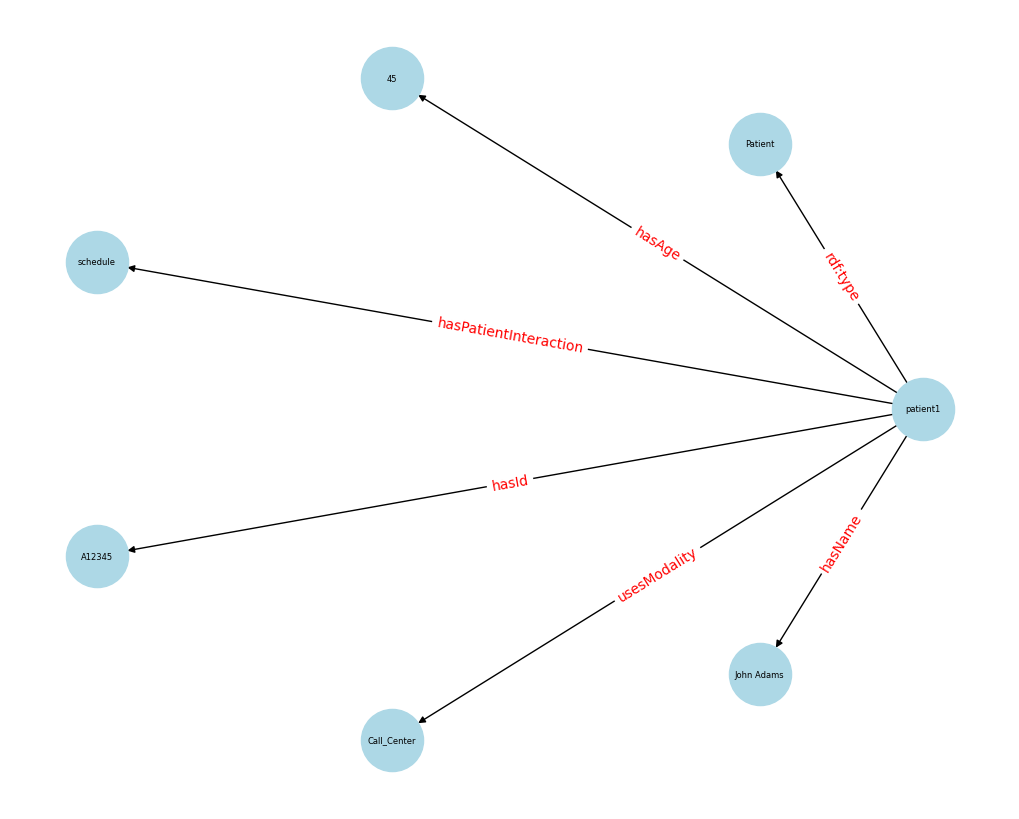

In [13]:
triples1 = get_triples(patient1)
# get the relationship for patient1
print(triples1)
draw_k_graph(triples1)

In [60]:
triples2 = get_triples(rpp)
# the relationship for  the procedure

In [61]:
triples = triples1 + triples2

In [62]:
triples

[('patient1', 'rdf:type', 'Patient'),
 ('patient1', 'hasAge', 45),
 ('patient1', 'hasId', 'A12345'),
 ('patient1', 'hasName', 'John Adams'),
 ('patient1', 'hasPatientInteraction', 'f2f'),
 ('patient1', 'hasUndergoneProcedure', 'rpp'),
 ('patient1', 'hasProcedureDoneDatetime', '2023-10-01T10:00:00'),
 ('rpp', 'rdf:type', 'Procedure'),
 ('rpp', 'hasTimestamp', '2023-10-01T10:00:00'),
 ('rpp', 'procedurePerformedOn', 'patient1')]

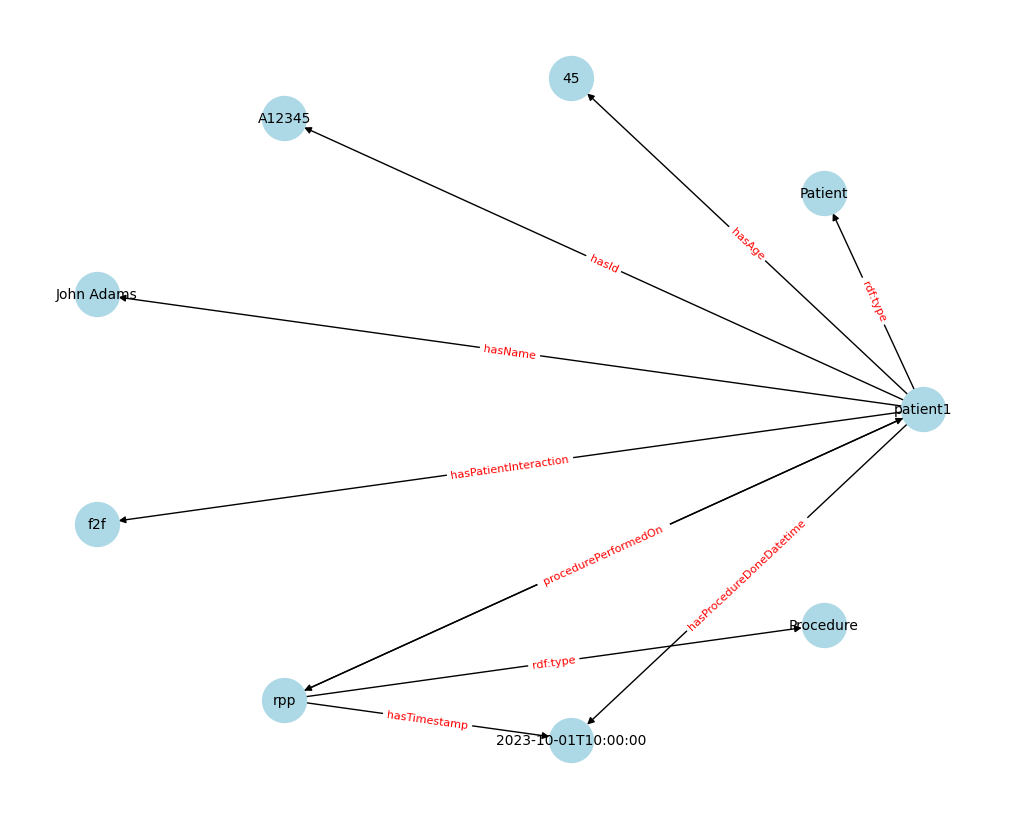

<Figure size 640x480 with 0 Axes>

In [63]:
draw_k_graph(triples)

In [21]:

%ls

 Volume in drive C is OS
 Volume Serial Number is 261D-E2C2

 Directory of C:\Users\alonb\PythonOntology\src\Operational-Ontologies

10/13/2025  07:48 PM    <DIR>          .
10/13/2025  05:39 PM    <DIR>          ..
10/13/2025  05:39 PM    <DIR>          .ipynb_checkpoints
10/13/2025  06:33 PM    <DIR>          __pycache__
10/13/2025  05:39 PM           156,230 150518_LapOntoSPM.owl
10/13/2025  07:35 PM    <DIR>          Assets
10/13/2025  07:48 PM           310,015 Clinical_Individuals.ipynb
10/13/2025  05:39 PM             1,840 CoffeeOntology0.py
10/13/2025  05:39 PM           272,703 FMA_for_LapOntoSPM.owl
10/13/2025  05:39 PM             2,745 individuals.py
10/13/2025  05:39 PM             2,398 knowledge_graph_encounter.png
10/13/2025  05:39 PM                98 obo0.py
10/13/2025  05:39 PM             1,142 onto0.py
10/13/2025  05:39 PM             3,594 PJO0.py
10/13/2025  07:46 PM            12,358 PJO1.py
10/13/2025  05:39 PM                54 README.md
10/13/2025  05:49 PM 

In [40]:
from owlready2 import get_ontology, onto_path
do_ontology = get_ontology(".\\Assets\\DocumentOntologyRDF.owl").load() 


In [52]:
[(c, c.label) for c in list(do_ontology.classes())]

[(loinc.org.LP32525-5, ['Documents']),
 (loinc.org.LP410934-6, ['Kind of document']),
 (loinc.org.LP187187-2, ['Role']),
 (loinc.org.LP173061-5, ['Setting']),
 (loinc.org.LP410933-8, ['Subject Matter Domain']),
 (loinc.org.LP410935-3, ['Type of service']),
 (loinc.org.LP172894-0, ['Forensic medicine (LP)']),
 (loinc.org.LP172896-5, ['Interventional radiology (LP)']),
 (loinc.org.LP173018-5, ['Radiology (LP)']),
 (loinc.org.LP172897-3, ['Multidisciplinary (LP)']),
 (loinc.org.LP172960-9, ['Multi-specialty program (LP)']),
 (loinc.org.LP172898-1,
  ['Neurology w special qualifications in child neuro (LP)']),
 (loinc.org.LP172964-1, ['Neurology (LP)']),
 (loinc.org.LP172899-9, ['Nutrition and dietetics (LP)']),
 (loinc.org.LP172901-3, ['Oncology (LP)']),
 (loinc.org.LP172902-1, ['Oral and maxillofacial surgery (LP)']),
 (loinc.org.LP172911-2, ['Acupuncture (LP)']),
 (loinc.org.LP342846-5, ['Integrative medicine (LP)']),
 (loinc.org.LP172912-0, ['Addiction psychiatry (LP)']),
 (loinc.org.L

In [54]:
dir(a)

['INDIRECT_get_properties',
 '__class__',
 '__classcell__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__label',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_equivalent_to',
 '_get_instance_possible_relations',
 '_get_is_instance_of',
 '_instance_equivalent_to_changed',
 '_instance_is_a_changed',
 '_name',
 '_set_is_instance_of',
 'differents',
 'entity_class',
 'generate_default_name',
 'get_equivalent_to',
 'get_inverse_properties',
 'get_iri',
 'get_name',
 'get_properties',
 'iri',
 'is_a',
 'is_instance_of',
 'name',
 'namespace',
 'reload',
 'set_equivalent_to',
 'set_iri',
 'set_name',
 'storid']

In [61]:
a.get_inverse_properties()

TypeError: Thing.get_inverse_properties() missing 1 required positional argument: 'self'